In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
houseData = pd.read_csv("train.csv", index_col=["Id"])
print(houseData.shape)
houseData.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
houseData.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
catVars = ['MSSubClass', 'MSZoning', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive',
       'PoolQC',
       'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
houseData[catVars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [7]:
contVars = [col for col in houseData.columns if col not in catVars]
houseData[contVars].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   YearBuilt      1460 non-null   int64  
 3   YearRemodAdd   1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  GarageYrBlt    1379 non-null   float64
 14  GarageArea     1460 non-null   int64  
 15  WoodDeckSF     1460 non-null   int64  
 16  OpenPorchSF    1460 non-null   int64  
 17  EnclosedPorch  1460 non-null   int64  
 18  3SsnPorc

##### Giving NA meaning in data wherever it is valid

In [8]:
naValMap = {'Alley'        : "NoAlley",
            'BsmtQual'     : "NoBsmt",
            'BsmtCond'     : "NoBsmt",
            'BsmtExposure' : "NoBsmt",
            'BsmtFinType1' : "NoBsmt",
            'BsmtFinType2' : "NoBsmt",
            'FireplaceQu'  : "NoFirePlace",
            'GarageType'   : "NoGrg",
            'GarageFinish' : "NoGrg",
            'GarageQual'   : "NoGrg",
            'GarageCond'   : "NoGrg",
            'PoolQC'       : "NoPool",
            'Fence'        : "NoFence",
            'MiscFeature'  : "NoMiscF",
           }

for attr in naValMap.keys():
    houseData.loc[houseData[attr].isnull(), attr] = naValMap[attr]

In [9]:
colWithNullData = houseData.columns[houseData.isnull().sum() > 0]
houseData[colWithNullData].isnull().sum()

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

##### Handling null data

In [10]:
nullData = {
    'cont' : [],
    'cat'  : [],
}
for col in colWithNullData:
    catCont = "cont" if col in contVars else "cat"
    nullData[catCont].append(col)
nullData

{'cont': ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'],
 'cat': ['MasVnrType', 'Electrical']}

In [11]:
houseData[nullData['cont']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [12]:
for col in nullData['cat']:
    print(houseData[col].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [13]:
print((houseData['GarageYrBlt'] - houseData['YearBuilt']).describe())
print("\n\n")
print((houseData['GarageYrBlt'] - houseData['YearRemodAdd']).describe())

count    1379.000000
mean        5.547498
std        16.580490
min       -10.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       123.000000
dtype: float64



count    1379.000000
mean       -6.928934
std        19.472042
min       -98.000000
25%        -2.000000
50%         0.000000
75%         0.000000
max        53.000000
dtype: float64


In [14]:
# 'GarageYrBlt' is very closely following 'YearBuilt' as well as 'YearRemodAdd'. Set it to any.
houseData.loc[houseData['GarageYrBlt'].isnull(), 'GarageYrBlt'] = houseData.loc[houseData['GarageYrBlt'].isnull(), 'YearBuilt']

In [15]:
# Mean & Meadian for 'LotFrontage' are very close.
houseData.loc[houseData['LotFrontage'].isnull(), 'LotFrontage'] = 69

In [16]:
print(houseData['MasVnrArea'].value_counts())
houseData.loc[houseData['MasVnrArea'].isnull(), 'MasVnrType']

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64


Id
235     NaN
530     NaN
651     NaN
937     NaN
974     NaN
978     NaN
1244    NaN
1279    NaN
Name: MasVnrType, dtype: object

In [17]:
houseData.loc[houseData['MasVnrArea']==0, 'MasVnrType'].value_counts()

None       859
BrkFace      1
Stone        1
Name: MasVnrType, dtype: int64

In [18]:
# Checked with median & mode: 'MasVnrArea' is 0 and corresponding 'MasVnrType' is 'None'.
houseData.loc[houseData['MasVnrArea'].isnull(), 'MasVnrType'] = 'None'
houseData.loc[houseData['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

In [19]:
# Checked with median: setting 'Electrical' to 'SBrkr'
houseData.loc[houseData['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

In [20]:
houseData[colWithNullData].isnull().sum()

LotFrontage    0
MasVnrType     0
MasVnrArea     0
Electrical     0
GarageYrBlt    0
dtype: int64

##### Comparing 'YearRemodAdd' & 'YearBuilt'

In [21]:
print((houseData['YearRemodAdd'] - houseData['YearBuilt']).describe())
print('\n\n')
(houseData['YearRemodAdd'] - houseData['YearBuilt']).value_counts()

count    1460.000000
mean       13.597945
std        24.476465
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       123.000000
dtype: float64





0      764
1      215
30      21
9       14
2       14
      ... 
100      1
76       1
110      1
122      1
84       1
Length: 109, dtype: int64

In [22]:
# For 2/3rd data 'YearBuilt' & 'YearRemodAdd' is close to each other.
# Thus 'SellAge' can be calculated as 'selling-date' - 'YearRemodAdd'
houseData['SellAge'] = (houseData['YrSold'] - houseData['YearRemodAdd'])*12 + houseData['MoSold']
houseData['SellAge'].describe()

count    1460.000000
mean      281.721918
std       247.619121
min        -2.000000
25%        56.000000
50%       176.000000
75%       499.250000
max       727.000000
Name: SellAge, dtype: float64

In [23]:
houseData.loc[houseData['SellAge'] < 0, ['YrSold', 'YearRemodAdd', 'MoSold', 'SaleCondition', 'YearBuilt']]

,YrSold,YearRemodAdd,MoSold,SaleCondition,YearBuilt
Id,,,,,
524,2007,2008,10,Partial,2007


In [24]:
houseData['GarageAge'] = (houseData['YrSold'] - houseData['GarageYrBlt'])*12 + houseData['MoSold']
houseData['GarageAge'].describe()

count    1460.000000
mean      382.020548
std       316.202631
min         1.000000
25%        90.000000
50%       366.000000
75%       593.000000
max      1644.000000
Name: GarageAge, dtype: float64

In [25]:
contVars.append('SellAge')
contVars.append('GarageAge')

In [26]:
contColToDrop = ['YrSold', 'MoSold', 'YearRemodAdd', 'GarageYrBlt', 'YearBuilt']
houseData.drop(columns=contColToDrop, inplace=True)
contVars = [ col for col in contVars if col not in contColToDrop ]

In [27]:
set(contVars) - set(houseData.columns)

set()

In [28]:
print(catVars)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']


In [29]:
print(contVars)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'SellAge', 'GarageAge']


In [30]:
print(len(houseData.columns))
print(len(contVars))
print(len(catVars))
houseData.shape

77
22
55


(1460, 77)

## Step 2: Visualising the Data

We'll visualise data using `matplotlib` and `seaborn`.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Checking Categorical Variables

In [32]:
# Function to plot catagorical columns with Sale Price
def getBoxPlotsForCatVarsWithSalePrice(colList: list, figSize: tuple, pdData: pd.DataFrame, getValCount: bool=False) -> None:
    for i in range(len(colList)):
        if getValCount == True:
            print(pdData[colList[i]].value_counts())
        plt.figure(figsize=figSize)
        plt.subplot(len(colList)//2+1, 2, i+1)
        sns.boxplot(x=colList[i], y='SalePrice', data=pdData).set(
            xlabel=f"{colList[i]} ({str(pdData[colList[i]].value_counts().index.tolist()[0])} => {pdData[colList[i]].value_counts().tolist()[0]})")
    plt.show()

In [33]:
skewedAttrCol = []
highSkewedAttrCol = []
tooHighSkewedAttrCol = []
tooHighOneAttrCol = []
for col in catVars:
    colValCountList = houseData[col].value_counts().tolist() 
    if colValCountList[0] > 1350: # One single attribute is set for almost whole column. 
        tooHighOneAttrCol.append(col)
    elif colValCountList[0] > 1100: # 80-20 ratio
        skewedAttrCol.append(col)
        if colValCountList[1] < 150:  # second highest is not even 10%
            highSkewedAttrCol.append(col)
        if colValCountList[1] < 75:   # second highest is not even 5%
            tooHighSkewedAttrCol.append(col)

print(f"{len(skewedAttrCol)} => {skewedAttrCol}")
print(f"{len(highSkewedAttrCol)} => {highSkewedAttrCol}")
print(f"{len(tooHighSkewedAttrCol)} => {tooHighSkewedAttrCol}")
print(f"{len(tooHighOneAttrCol)} => {tooHighOneAttrCol}")

15 => ['MSZoning', 'LandContour', 'Condition1', 'BldgType', 'RoofStyle', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Electrical', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
12 => ['LandContour', 'Condition1', 'BldgType', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Electrical', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
3 => ['LandContour', 'BsmtCond', 'BsmtFinType2']
13 => ['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Functional', 'PoolQC', 'MiscFeature', 'BsmtHalfBath', 'KitchenAbvGr']


Pave    1454
Grvl       6
Name: Street, dtype: int64
NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
NoPool    1453
Gd           3
Ex           2
Fa           2
Name: PoolQC, dtype: int64
NoMiscF    1406
Shed         49
Gar2          2
Othr          2
Ten

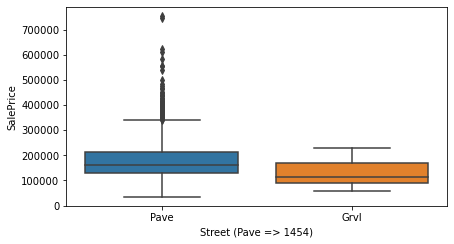

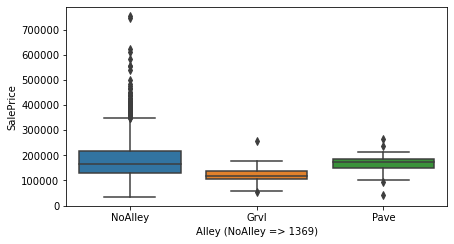

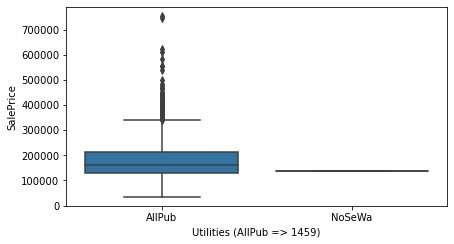

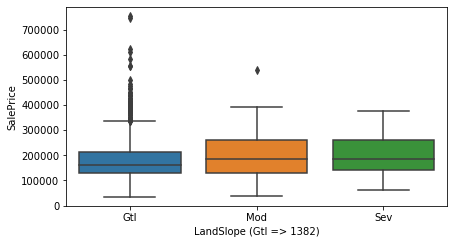

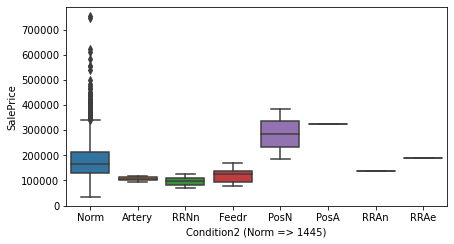

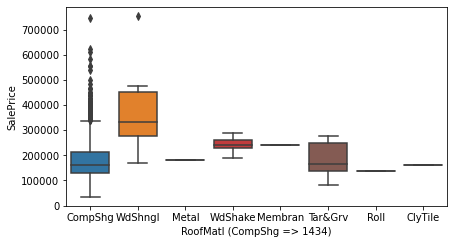

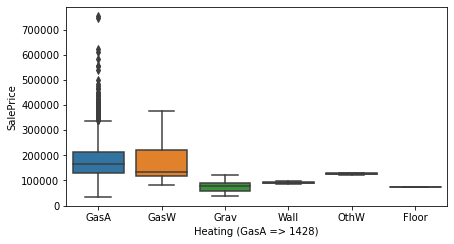

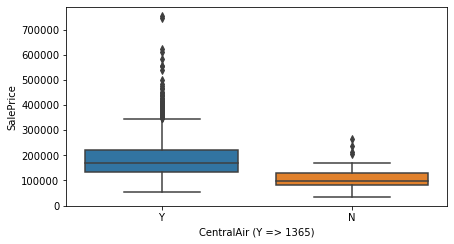

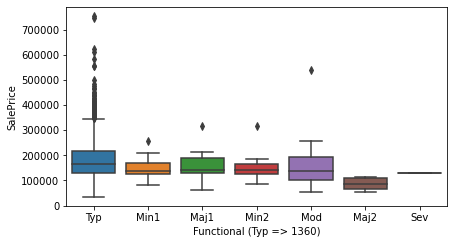

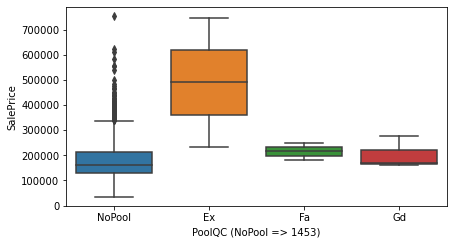

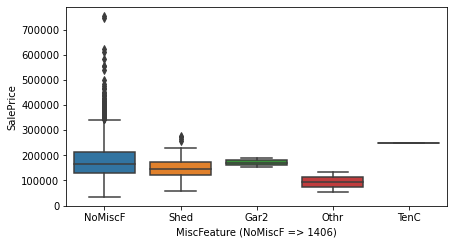

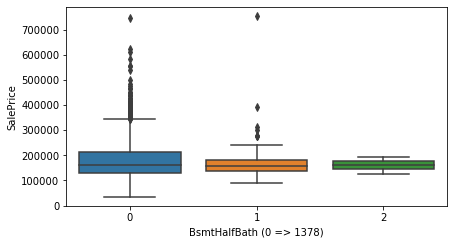

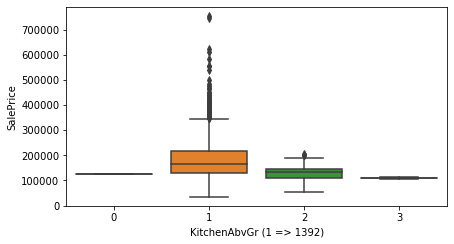

In [34]:
# Checking relation of those category-variables with "SalePrice", having mostly one attribute.
getBoxPlotsForCatVarsWithSalePrice(tooHighOneAttrCol, (15, 30), houseData, True)

In [35]:
# Except CentralAir, other columns can be removed, as either no clear
# change in percentile with respect to price or not-enough-data points.
tooHighOneAttrCol.remove('CentralAir')
catVars = [col for col in catVars if col not in tooHighOneAttrCol]

In [36]:
houseData.drop(columns=tooHighOneAttrCol, inplace=True)
houseData.shape

(1460, 65)

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
TA        1311
Gd          65
Fa          45
NoBsmt      37
Po           2
Name: BsmtCond, dtype: int64
Unf       1256
Rec         54
LwQ         46
NoBsmt      38
BLQ         33
ALQ         19
GLQ         14
Name: BsmtFinType2, dtype: int64


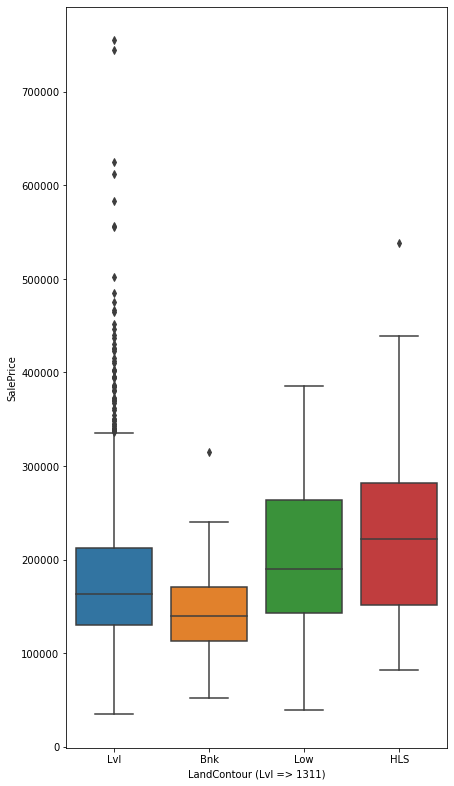

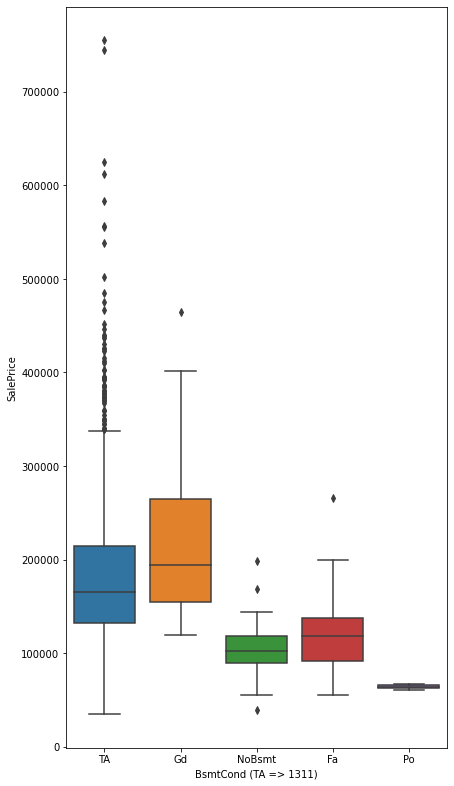

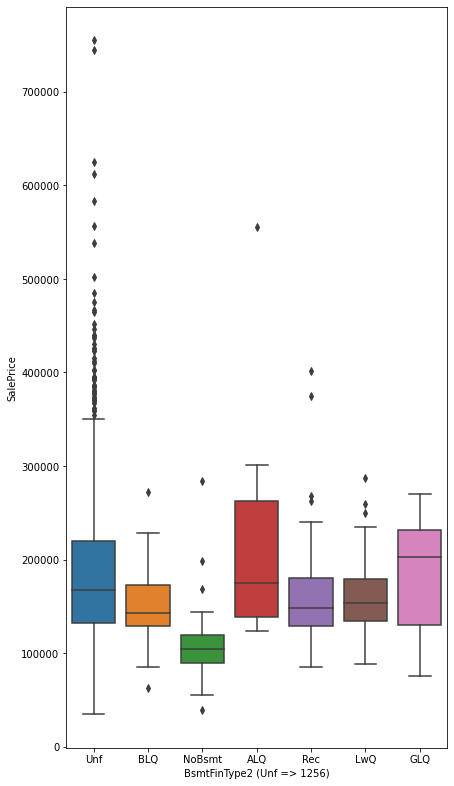

In [37]:
getBoxPlotsForCatVarsWithSalePrice(tooHighSkewedAttrCol, (15, 30), houseData, True)

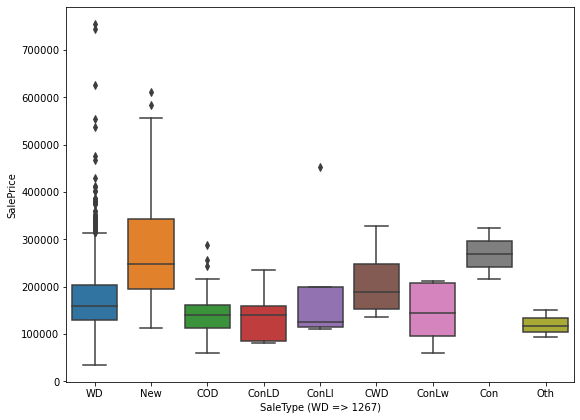

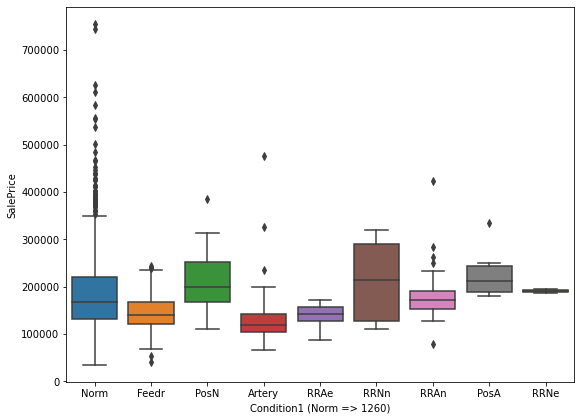

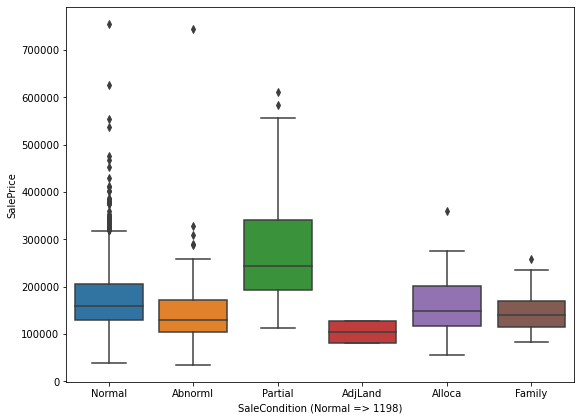

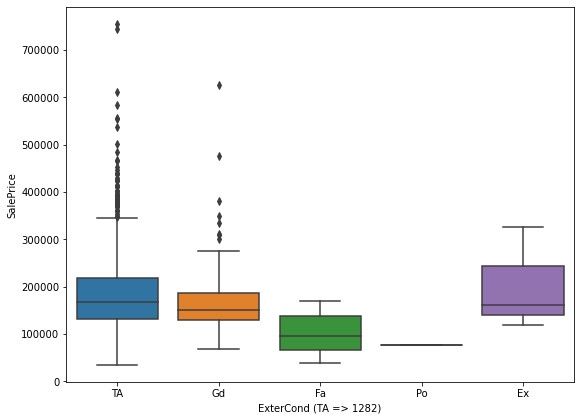

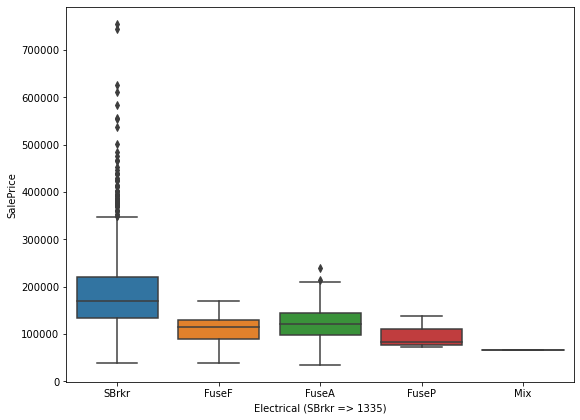

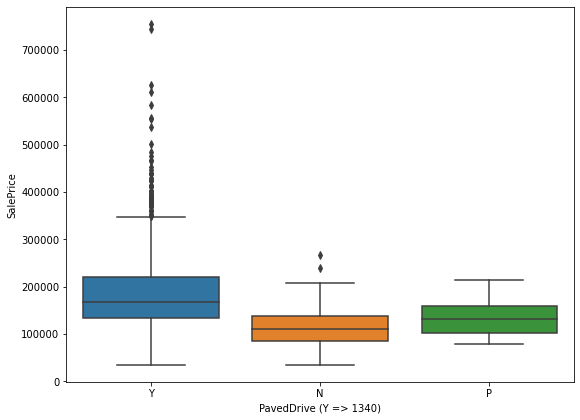

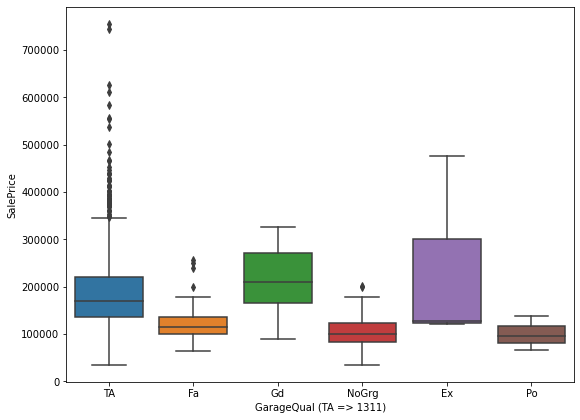

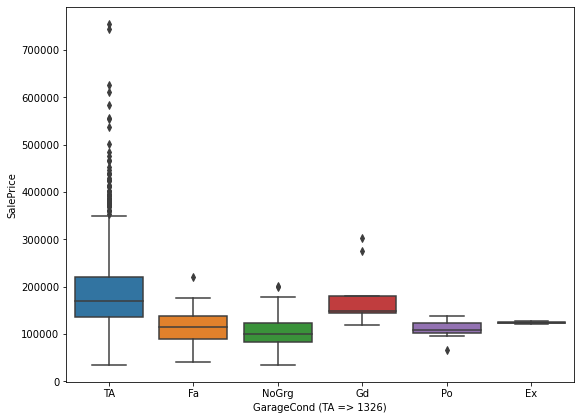

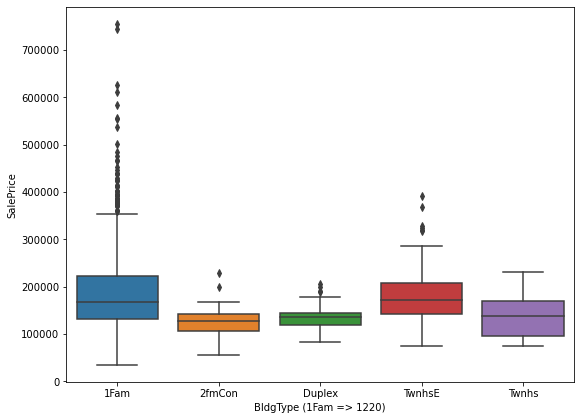

In [38]:
getBoxPlotsForCatVarsWithSalePrice(list(set(highSkewedAttrCol) - set(tooHighSkewedAttrCol)), (20, 40), houseData)

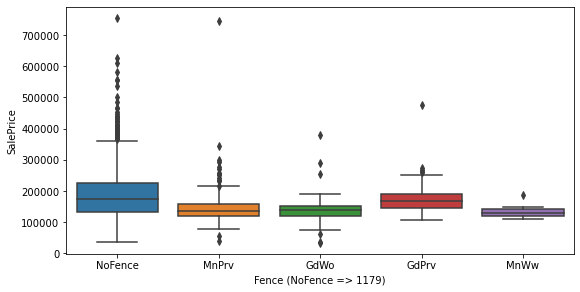

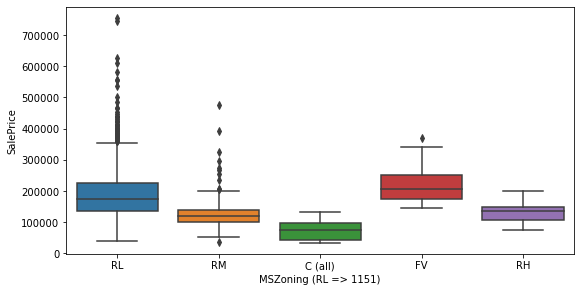

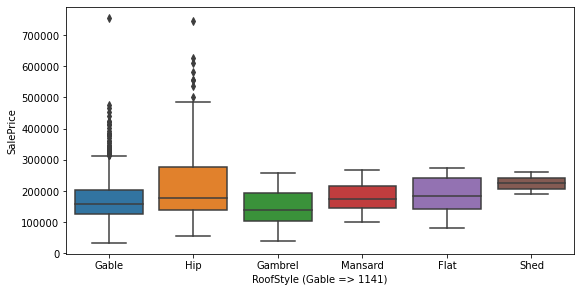

In [39]:
getBoxPlotsForCatVarsWithSalePrice(list(set(skewedAttrCol) - set(highSkewedAttrCol)), (20, 10), houseData)

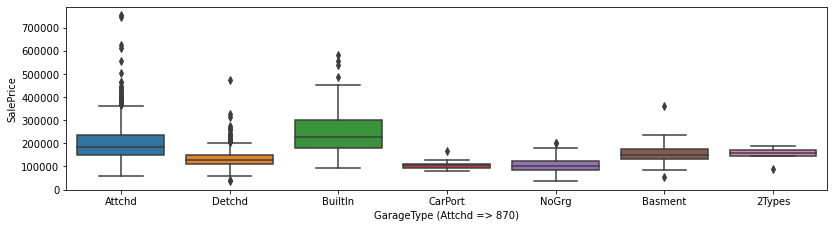

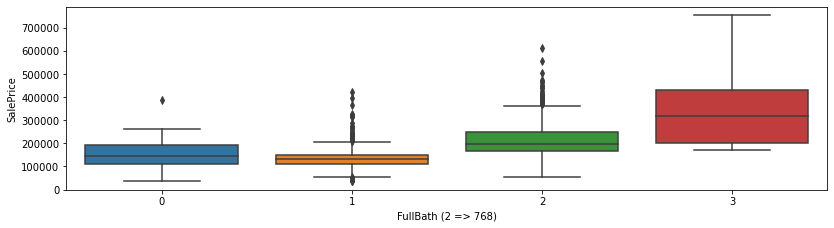

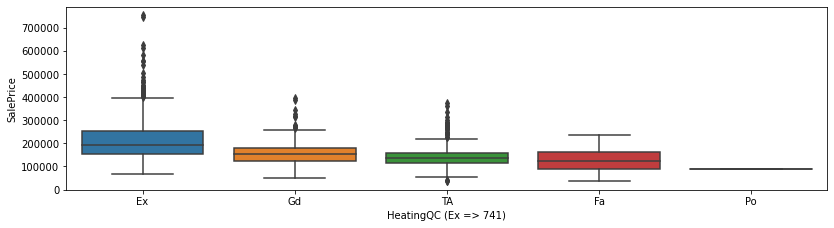

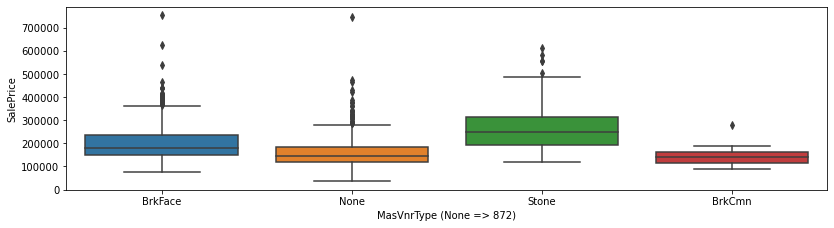

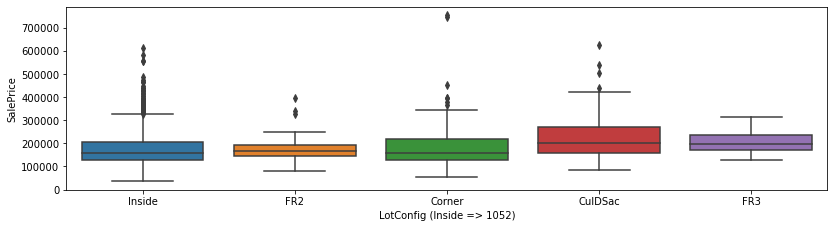

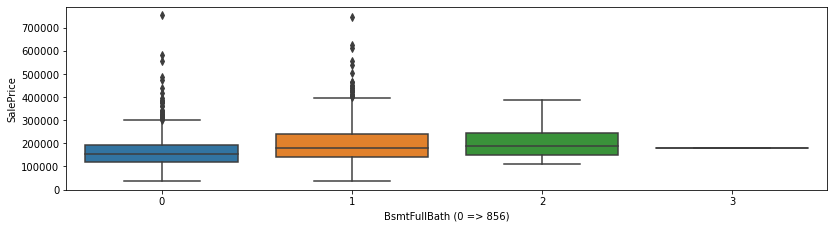

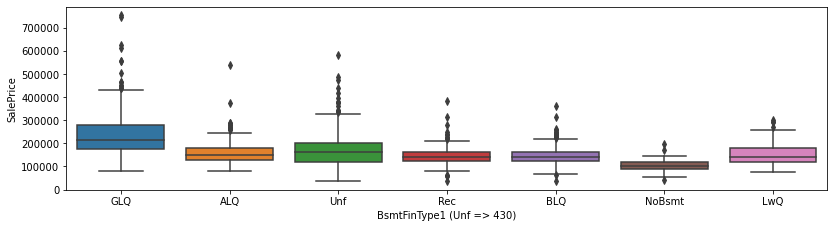

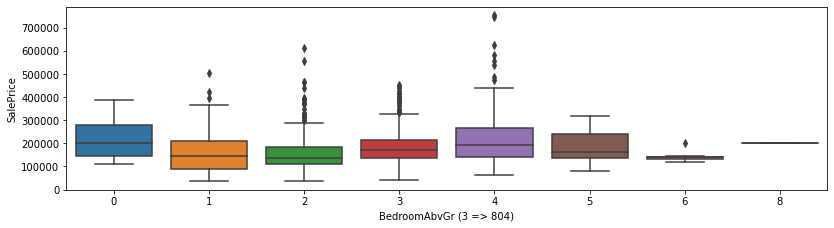

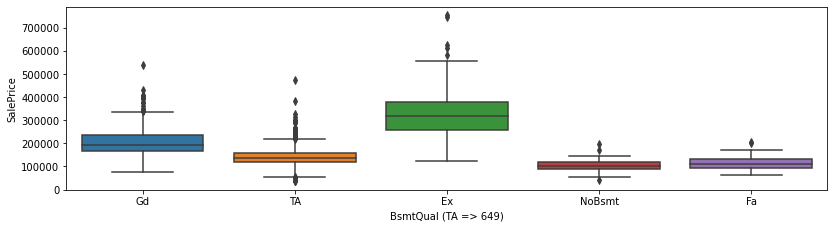

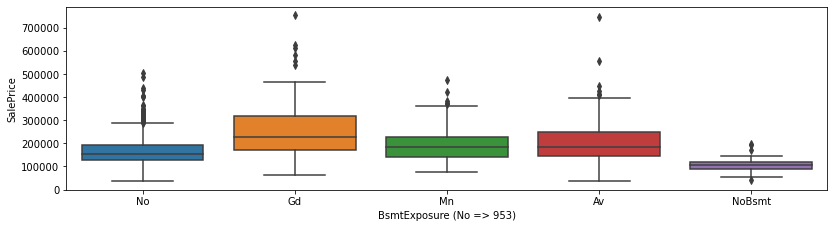

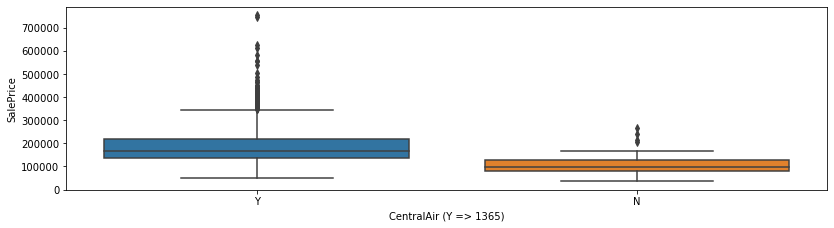

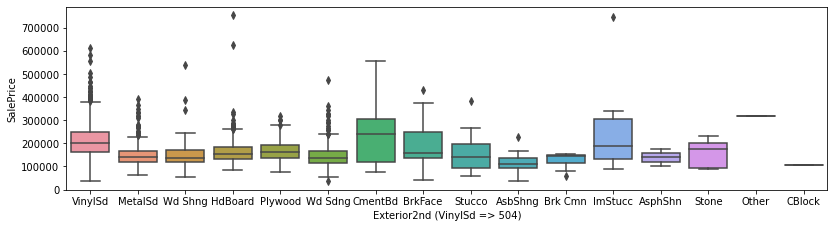

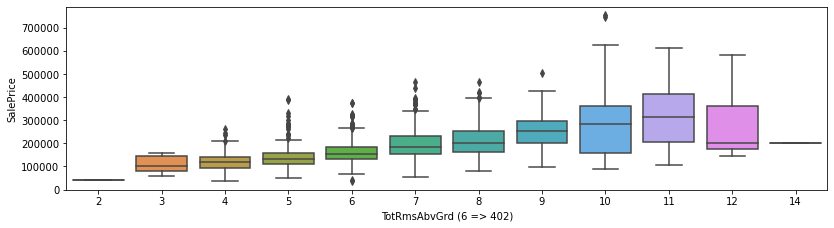

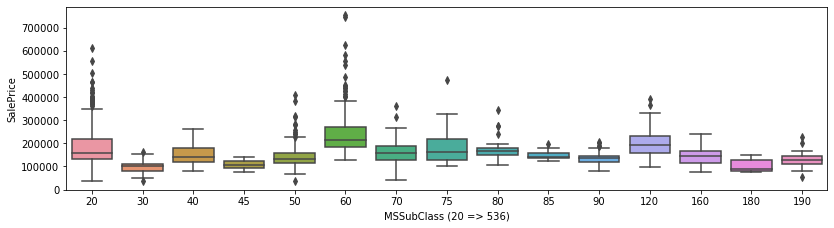

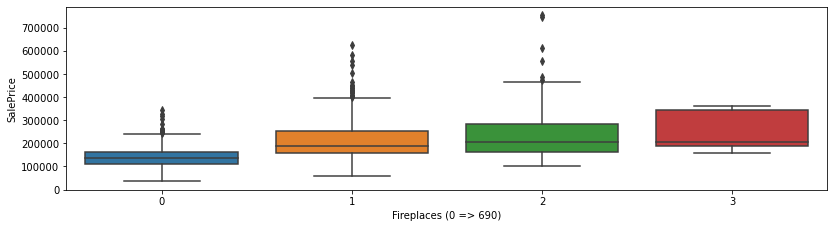

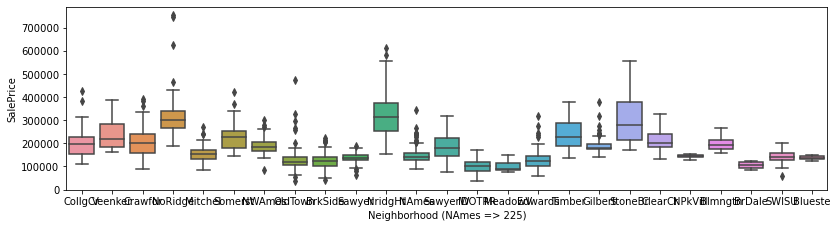

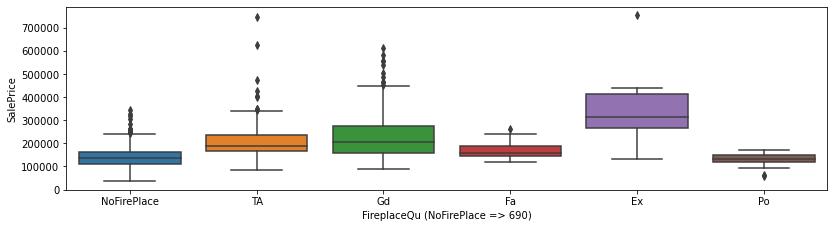

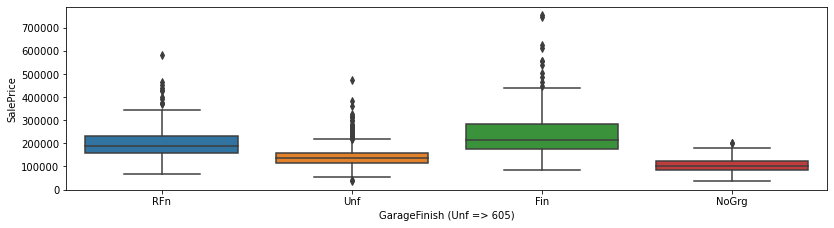

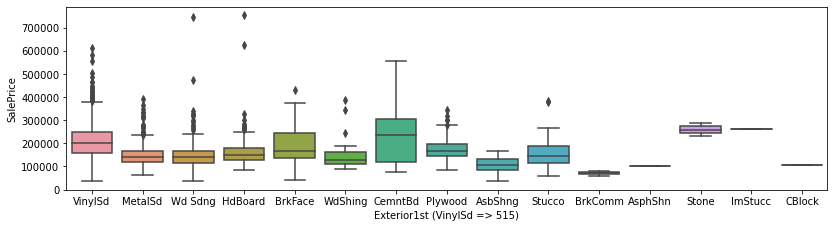

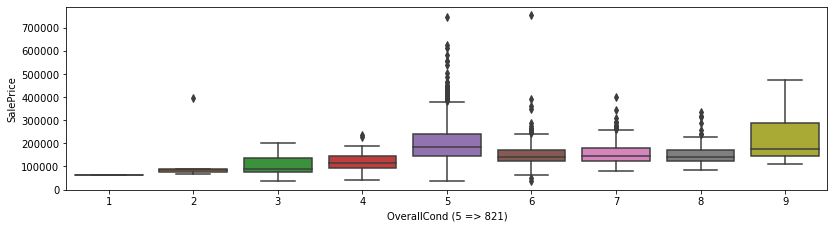

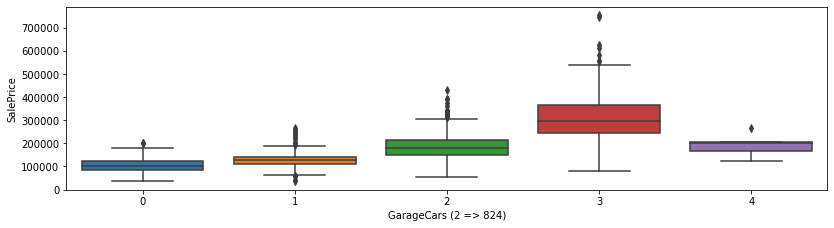

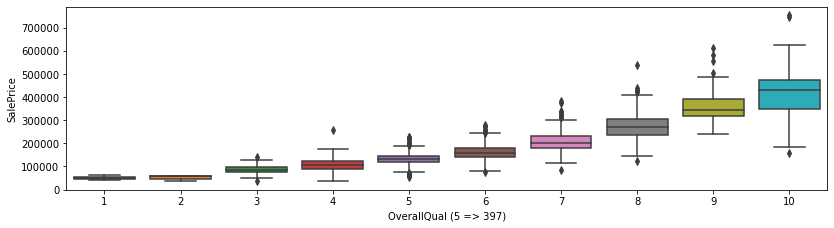

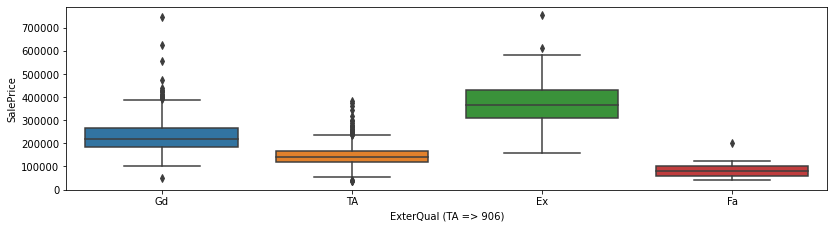

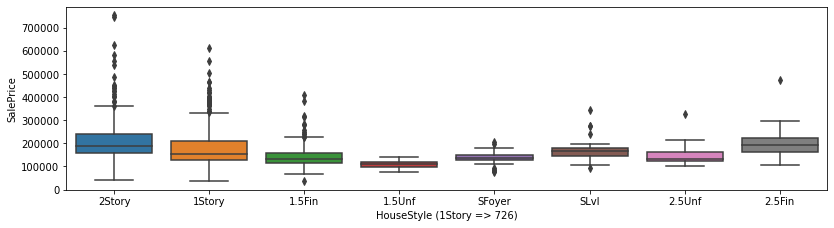

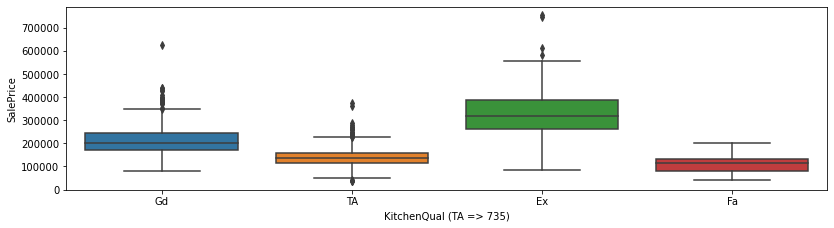

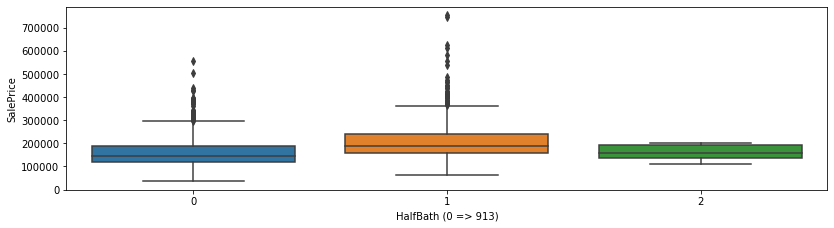

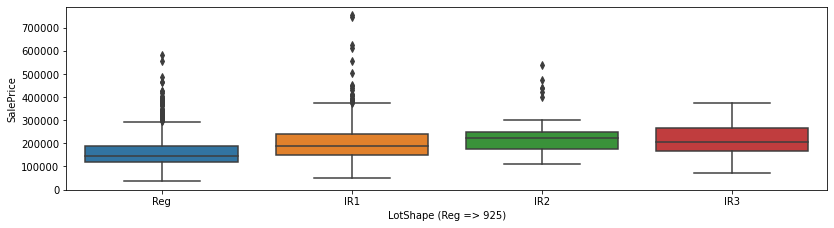

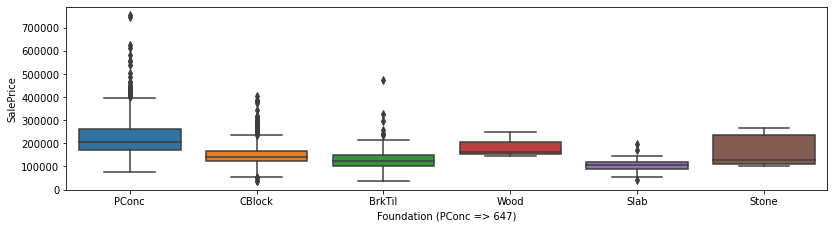

In [40]:
getBoxPlotsForCatVarsWithSalePrice(list(set(catVars) - set(skewedAttrCol)), (30, 60), houseData)

##### Too many outliers. Fixing it with standard IQR formula.

In [41]:
q1 = houseData['SalePrice'].quantile(.25)
q3 = houseData['SalePrice'].quantile(.75)
iqr = q3 - q1
houseData.loc[(houseData['SalePrice']> q1-1.5*iqr) & (houseData['SalePrice']< q3+1.5*iqr)].shape

(1399, 65)

In [42]:
houseData = houseData.loc[(houseData['SalePrice']> q1-1.5*iqr) & (houseData['SalePrice']< q3+1.5*iqr)]

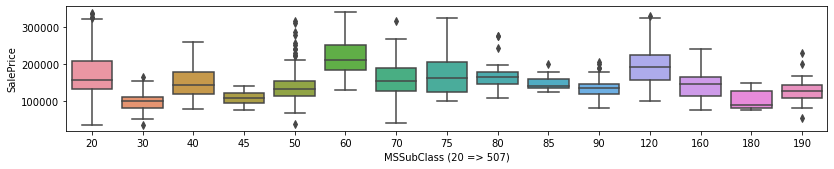

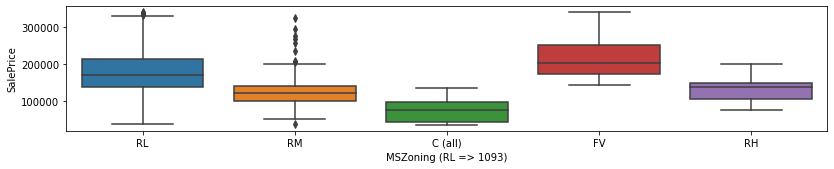

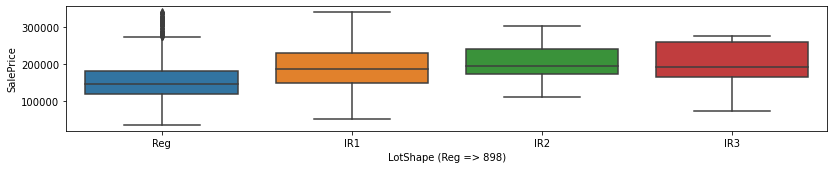

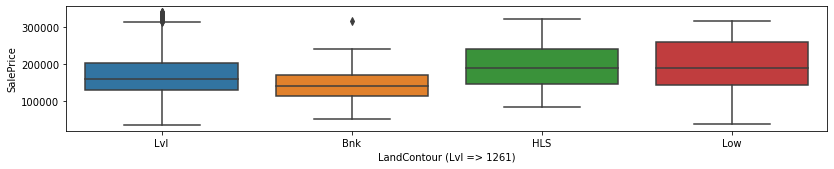

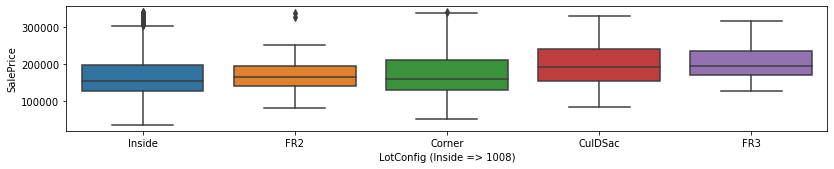

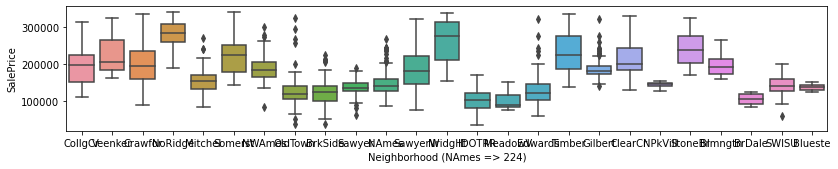

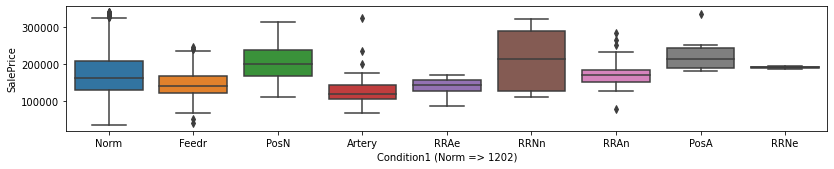

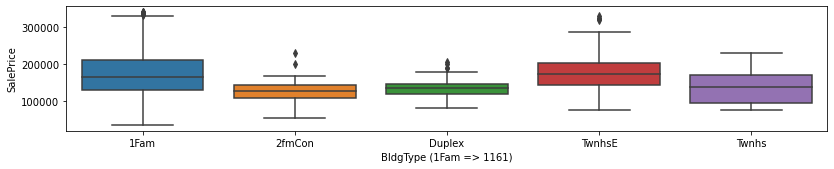

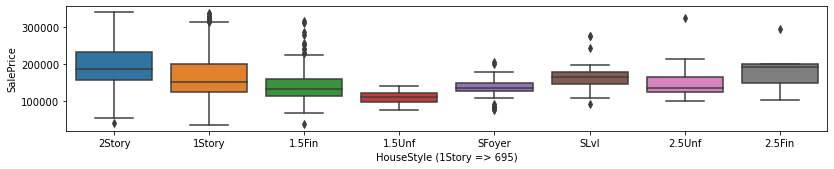

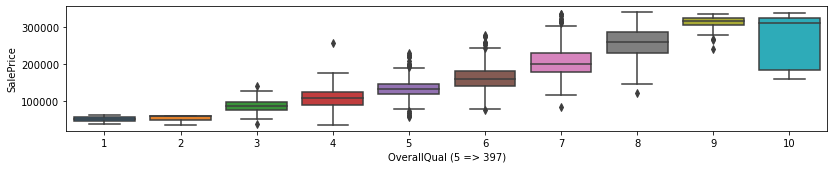

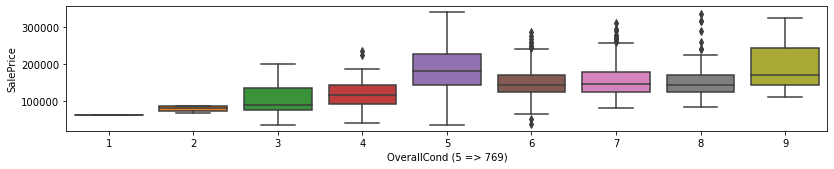

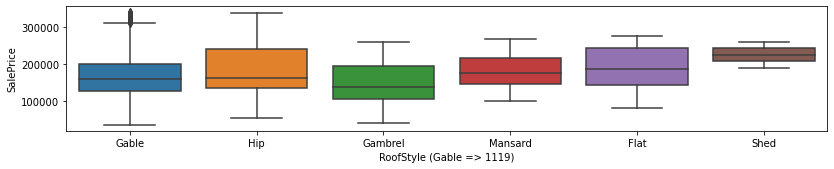

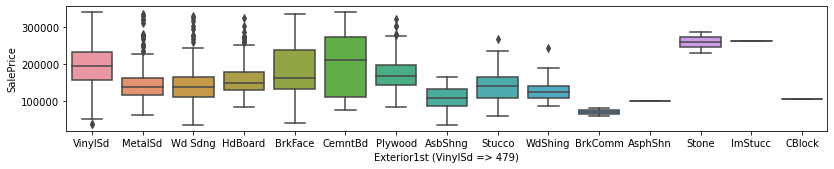

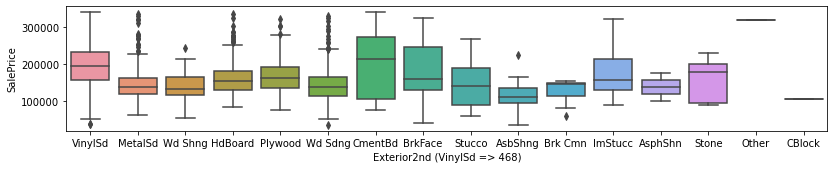

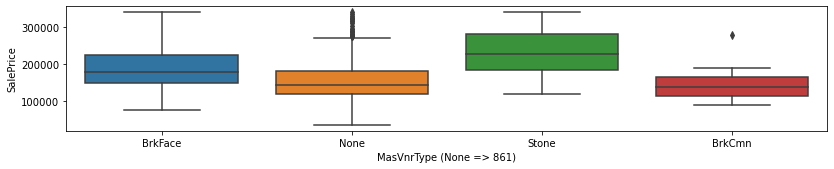

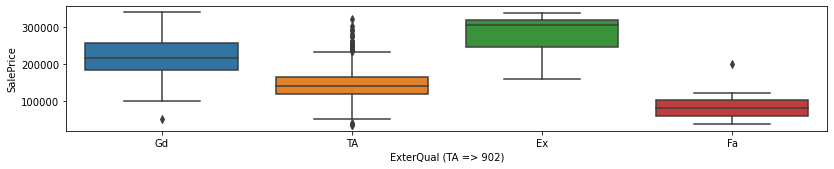

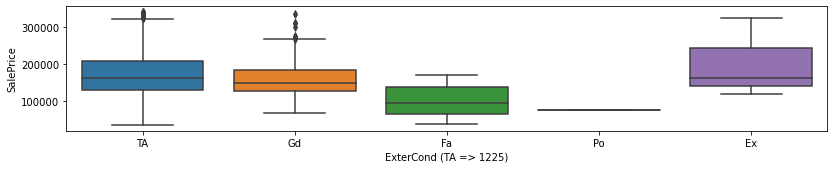

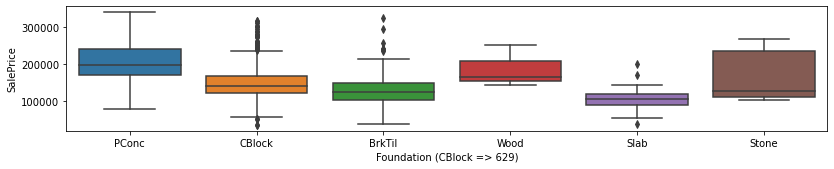

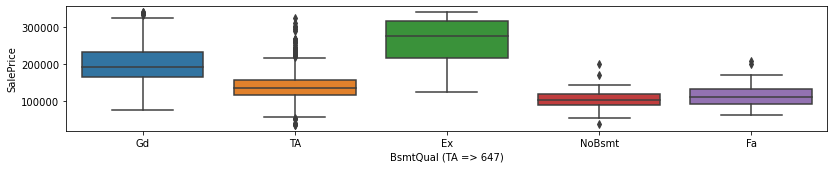

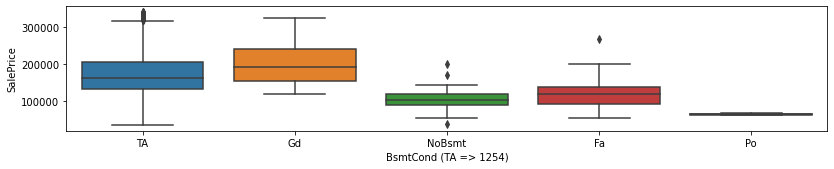

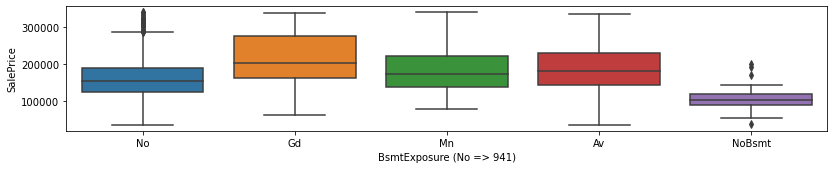

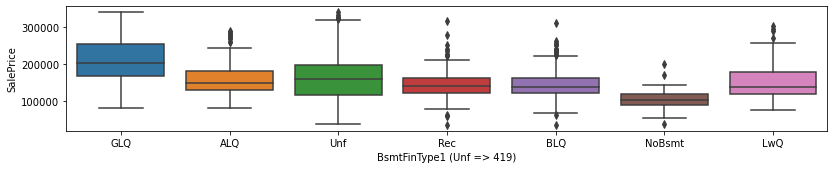

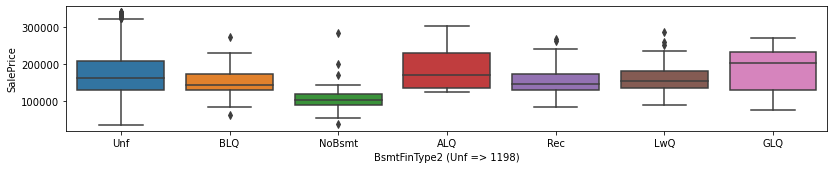

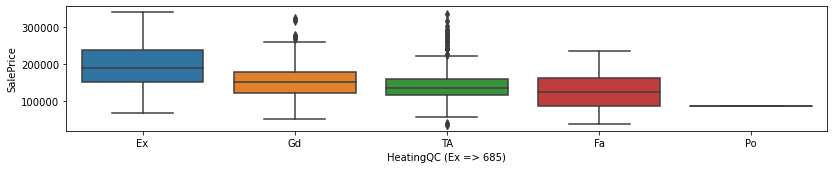

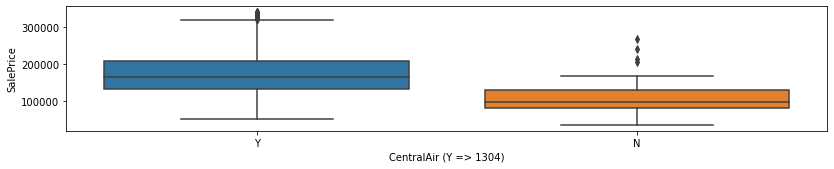

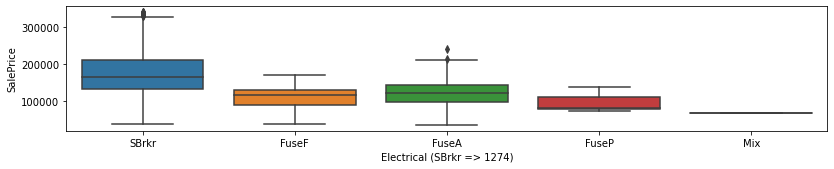

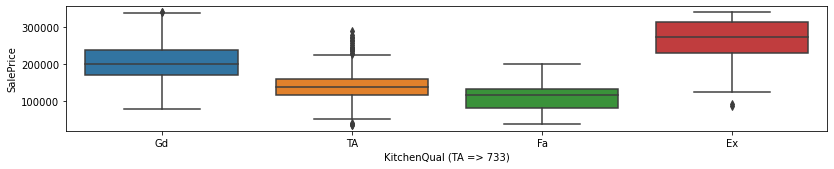

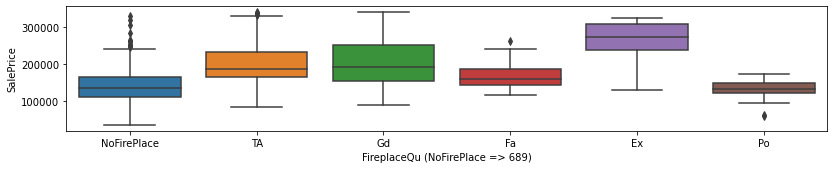

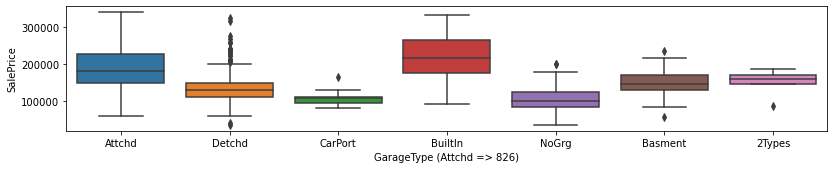

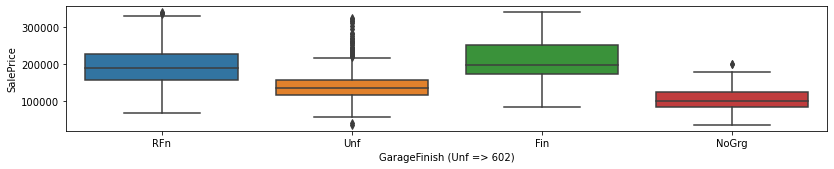

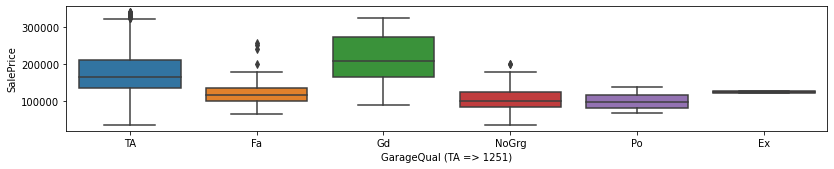

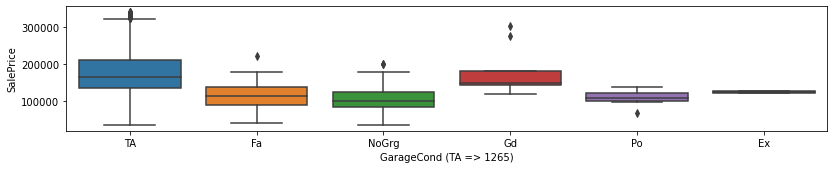

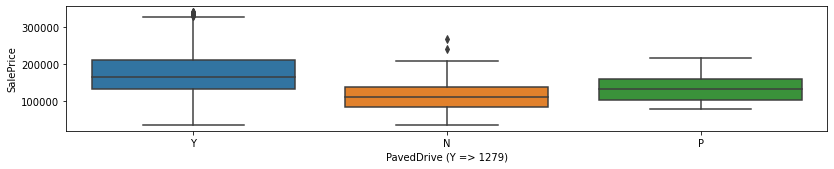

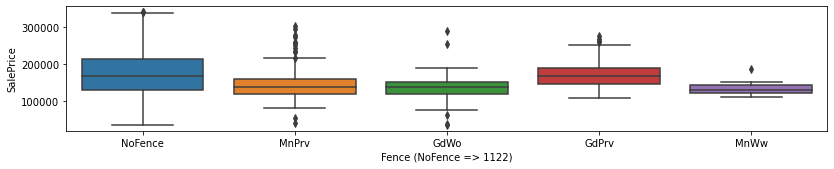

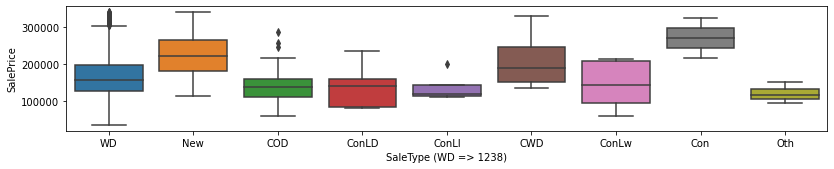

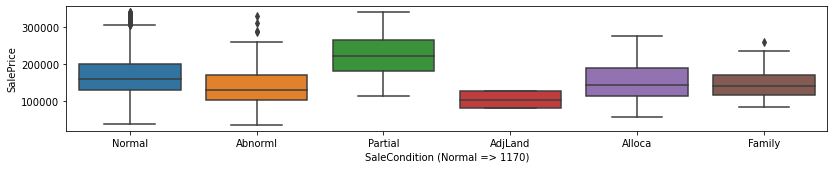

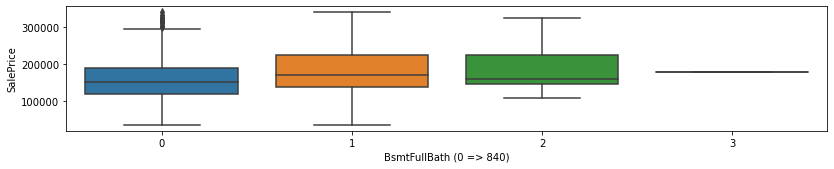

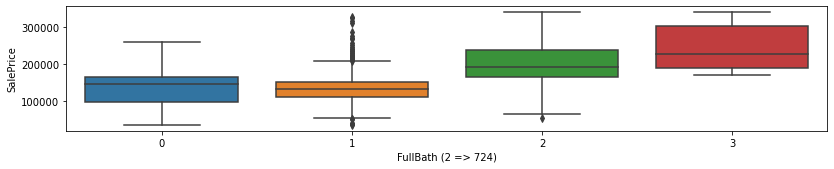

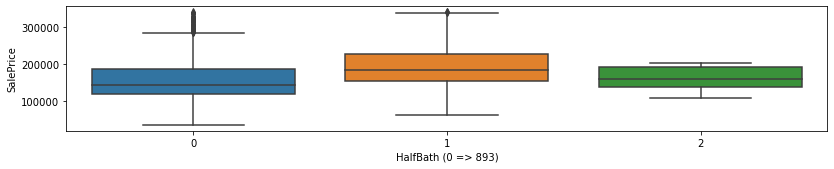

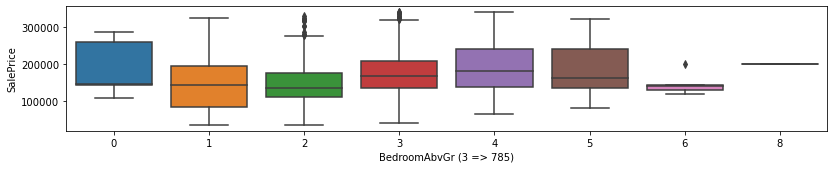

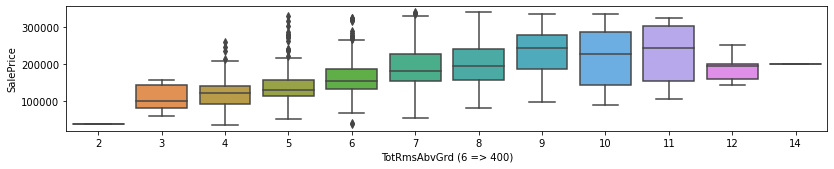

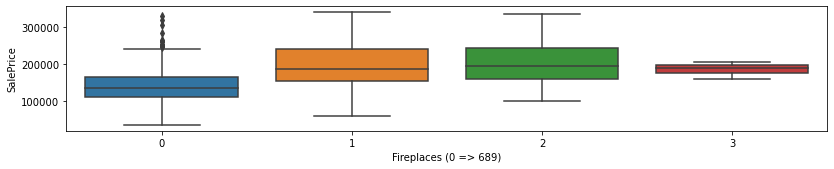

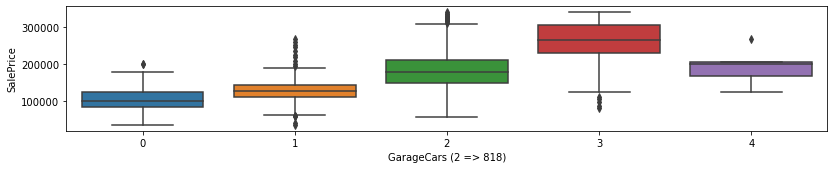

In [43]:
getBoxPlotsForCatVarsWithSalePrice(catVars, (30, 60), houseData)

In [44]:
# Checking if a column is dropped but not removed from catVars
set(catVars) - set(houseData.columns)

set()

##### Checking Continuous Variables

In [45]:
targetVar = 'SalePrice'
contVars.remove('SalePrice')

In [46]:
# Function to plot catagorical columns with Sale Price
def getScatterPlotForContVarsWithSalePrice(colList: list, figSize: tuple, pdData: pd.DataFrame, getValCount: bool=False) -> None:
    for i in range(len(colList)):
        if getValCount == True:
            print(pdData[colList[i]].value_counts())
        plt.figure(figsize=figSize)
        plt.subplot(len(colList)//2+1, 2, i+1)
        sns.scatterplot(data=pdData, x=colList[i], y=targetVar).set(
            xlabel=f"{colList[i]} ({str(pdData[colList[i]].value_counts().index.tolist()[0])} => {pdData[colList[i]].value_counts().tolist()[0]})")

    plt.show()

In [47]:
skewedCol = []
for attr in contVars:
    attrCountList = houseData[attr].value_counts().tolist()
    if attrCountList[0] > 1330: # A single value is set for almost whole column.
        skewedCol.append(attr)
print(skewedCol)

['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


0      1374
80        3
360       2
515       1
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
0      1377
168       3
216       2
180       2
144       2
196       1
96        1
23        1
162       1
182       1
245       1
320       1
238       1
508       1
140       1
130       1
407       1
290       1
Name: 3SsnPorch, dtype: int64
0      1393
512       1
648       1
576       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
0        1347
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64


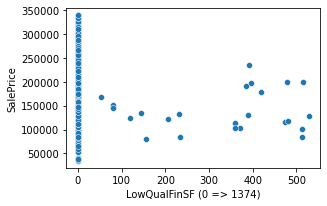

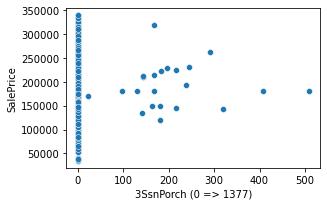

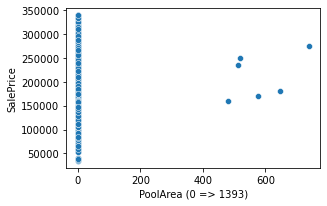

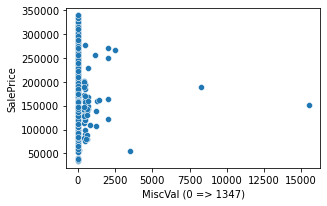

In [48]:
getScatterPlotForContVarsWithSalePrice(skewedCol, (10, 10), houseData, True)

In [49]:
contVars = [col for col in contVars if col not in skewedCol]
houseData.drop(columns=skewedCol, inplace=True)
houseData.shape

(1399, 61)

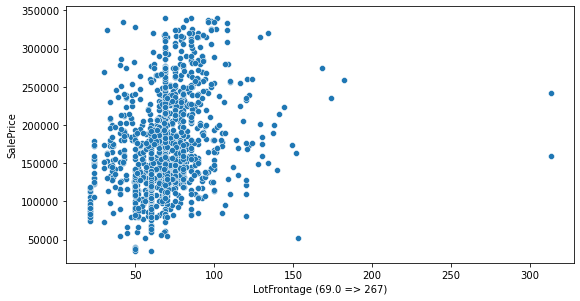

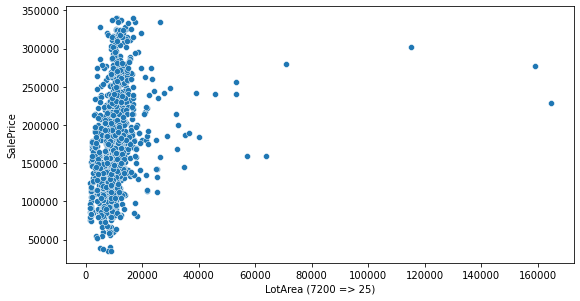

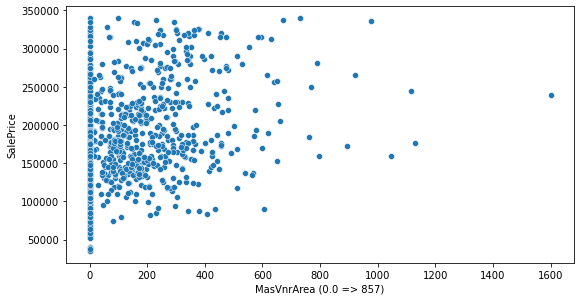

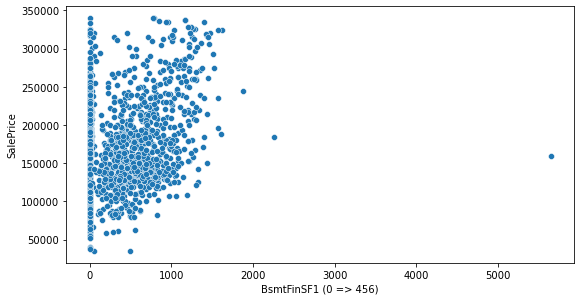

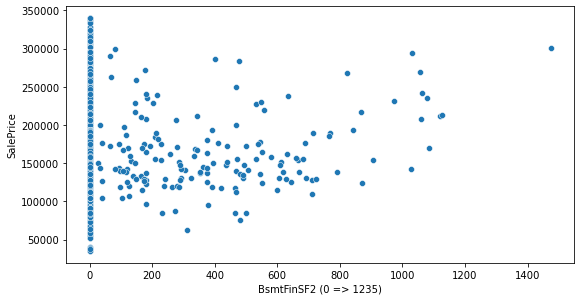

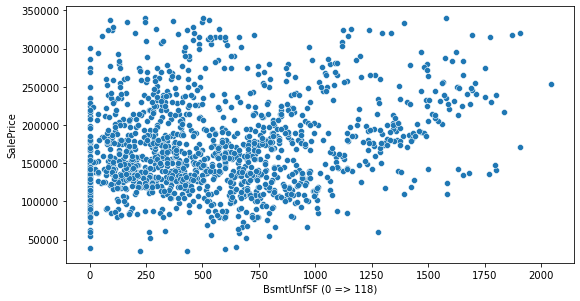

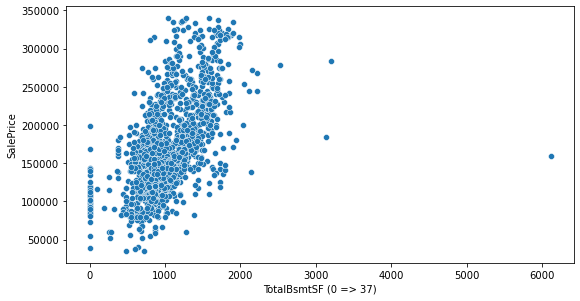

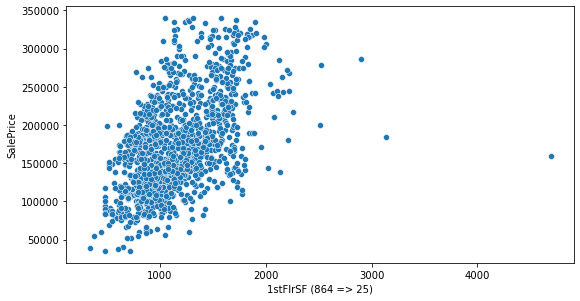

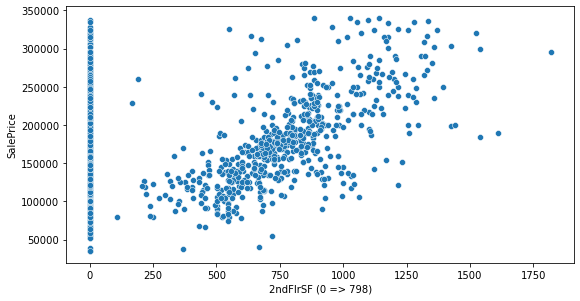

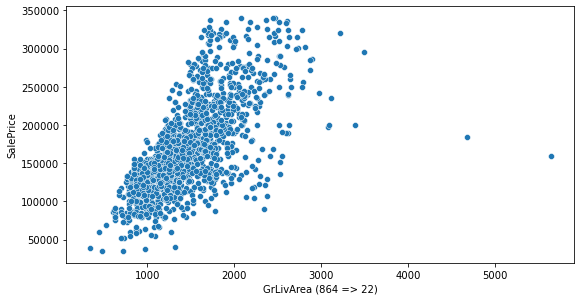

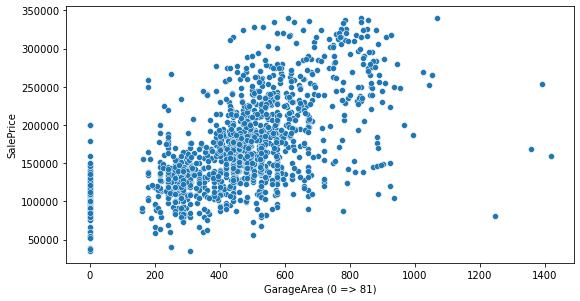

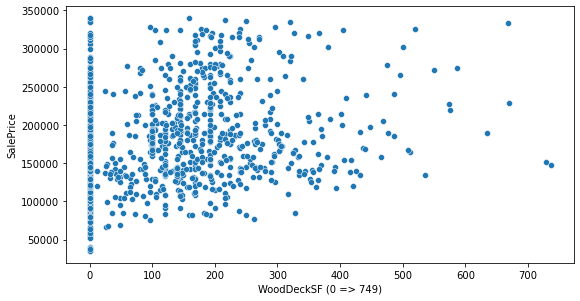

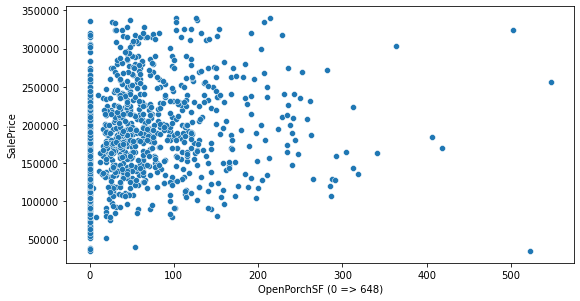

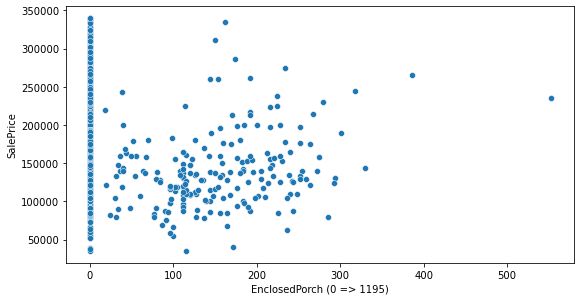

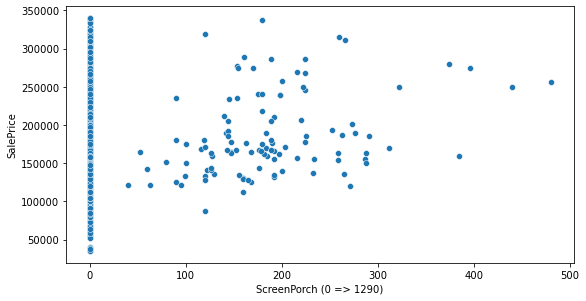

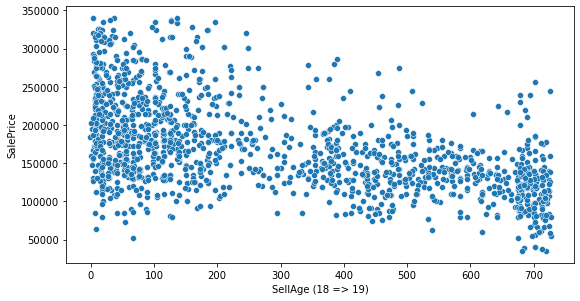

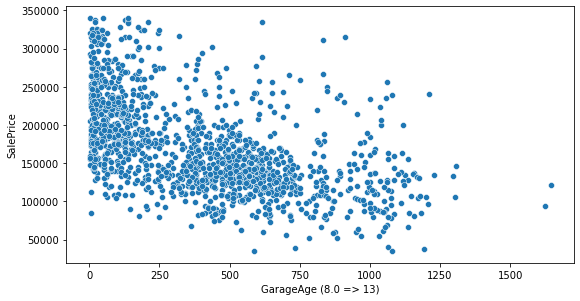

In [50]:
getScatterPlotForContVarsWithSalePrice(contVars, (20, 50), houseData)

#### Dummy Variables

`Categorical variable` having more than two value, should be converted into dummy variables.

In [51]:
dummyVarCol = (houseData[catVars].nunique()>2)
dummyVarCol = dummyVarCol.index[dummyVarCol]
dummyVarCol

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars'],
      dtype='object')

In [52]:
set(catVars) - set(dummyVarCol)

{'CentralAir'}

In [53]:
houseData['CentralAir'].value_counts()

Y    1304
N      95
Name: CentralAir, dtype: int64

In [54]:
houseData['CentralAir'] = houseData['CentralAir'].map({'Y' : 1, 'N' : 0})
houseData['CentralAir'].value_counts()

1    1304
0      95
Name: CentralAir, dtype: int64

In [55]:
houseData = pd.get_dummies(houseData, prefix=dummyVarCol.values, columns=dummyVarCol.values, drop_first = True)
print(houseData.columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       ...
       'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_14', 'Fireplaces_1',
       'Fireplaces_2', 'Fireplaces_3', 'GarageCars_1', 'GarageCars_2',
       'GarageCars_3', 'GarageCars_4'],
      dtype='object', length=267)


In [56]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 1 to 1460
Columns: 267 entries, LotFrontage to GarageCars_4
dtypes: float64(3), int64(16), uint8(248)
memory usage: 589.7 KB


#### Splitting the Data into Training and Testing Sets

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
df_train, df_test = train_test_split(houseData, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

# Applying scaler() to all the cont_var
allContVars = contVars + [targetVar]

df_train[allContVars] = scaler.fit_transform(df_train[allContVars])
df_train[allContVars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SellAge,GarageAge,SalePrice
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,0.162439,0.073141,0.053641,0.071551,0.032917,0.293510,0.165547,0.181501,0.180279,0.211902,0.319854,0.122998,0.077645,0.042068,0.028567,0.405961,0.244734,0.432552
std,0.071634,0.054550,0.097154,0.076079,0.111675,0.224436,0.068851,0.081683,0.228129,0.090060,0.145173,0.168511,0.114326,0.112872,0.113569,0.342316,0.194245,0.190755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.050347,0.000000,0.000000,0.000000,0.116535,0.127660,0.121960,0.000000,0.146383,0.220028,0.000000,0.000000,0.000000,0.000000,0.089163,0.062386,0.302568
50%,0.164384,0.067677,0.000000,0.062013,0.000000,0.254068,0.155974,0.165902,0.000000,0.204974,0.330042,0.000000,0.036563,0.000000,0.000000,0.275720,0.231893,0.399388
75%,0.195205,0.085962,0.082500,0.117558,0.000000,0.423097,0.200573,0.230151,0.392739,0.260362,0.398801,0.227335,0.113346,0.000000,0.000000,0.701646,0.366707,0.532310
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y_train = df_train.pop(targetVar)
X_train = df_train

In [62]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

##### Build simple linear regression model

In [63]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [64]:
y_train_pred = reg.predict(X_train)

In [65]:
r2_score(y_train, y_train_pred)

0.9275042848401902

In [66]:
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**2
print(rmse)

2.579912390209121
0.0026352526968428202
6.944556776217357e-06


In [67]:
# Calculate residual
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

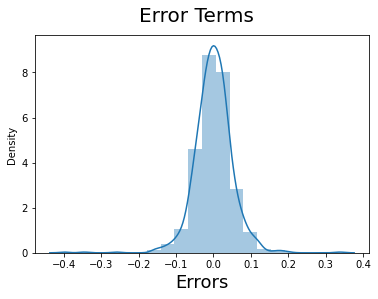

In [68]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

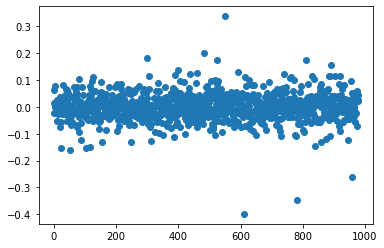

In [69]:
# Look for pattern in residual
plt.scatter(range(len(X_train)), res)

#### Making Predictions

#### Applying the scaling on the test sets

In [70]:
df_test[allContVars] = scaler.transform(df_test[allContVars])
df_test[allContVars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SellAge,GarageAge,SalePrice
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,0.169463,0.083812,0.061760,0.079518,0.030565,0.294079,0.172516,0.187054,0.196273,0.221714,0.332218,0.123358,0.092383,0.036978,0.034965,0.394546,0.228134,0.466796
std,0.078198,0.104258,0.104703,0.075290,0.107293,0.227886,0.060895,0.082673,0.240095,0.091366,0.141228,0.164660,0.132291,0.107700,0.115230,0.334395,0.186005,0.200822
min,0.000000,-0.001557,0.000000,0.000000,0.000000,0.000000,0.000000,0.034190,0.000000,0.055765,0.000000,0.000000,0.000000,0.000000,0.000000,0.006859,0.001826,-0.001349
25%,0.133562,0.056201,0.000000,0.000000,0.000000,0.106955,0.130728,0.125746,0.000000,0.153542,0.225317,0.000000,0.000000,0.000000,0.000000,0.096022,0.060103,0.317952
50%,0.164384,0.071275,0.000000,0.073795,0.000000,0.241207,0.165303,0.174162,0.000000,0.214488,0.338505,0.000000,0.050274,0.000000,0.000000,0.248971,0.219111,0.437951
75%,0.195205,0.090462,0.100000,0.127436,0.000000,0.425328,0.214566,0.238469,0.410891,0.273879,0.406206,0.225618,0.127514,0.000000,0.000000,0.711248,0.360469,0.589746
max,1.000000,1.435560,0.705625,0.333097,0.759837,1.071916,0.363830,0.588343,0.886139,0.576677,0.980254,1.010989,0.956124,0.699275,0.779167,0.991770,0.748022,1.000000


In [71]:
# Now let's use our model to make predictions.
y_test = df_test.pop(targetVar)
X_test = df_test
y_test_pred = reg.predict(X_test)

print(f"r2_score: {r2_score(y_test, y_test_pred)}")
rss = np.sum(np.square(y_test - y_test_pred))
print(f"RSS: {rss}")
mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse}")
rmse = mse**2
print(f"RMSE: {rmse}")

r2_score: -1.1715496394657131e+22
RSS: 1.9796889192965127e+23
MSE: 4.713545045944078e+20
RMSE: 2.2217506900143962e+41


In [72]:
print(f"intercept: {reg.intercept_}")
pd.DataFrame({"feature" : X_train.columns.values, "Val": reg.coef_}).sort_values(by='Val', key=abs, ascending=False).head(20)

intercept: 671079963657.2109


,feature,Val
263,GarageCars_2,-8.193004e+11
264,GarageCars_3,-8.193004e+11
262,GarageCars_1,-8.193004e+11
265,GarageCars_4,-8.193004e+11
200,GarageType_NoGrg,-3.171770e+11
207,GarageQual_Po,-2.867499e+11
212,GarageCond_Po,2.867499e+11
209,GarageCond_Fa,2.867499e+11
204,GarageQual_Fa,-2.867499e+11
208,GarageQual_TA,-2.867499e+11


##### Ridge Regression

In [73]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 25, 30, 50] # higher lamdas will lead to higher regularization
degrees = [1, 2]
for i in lambdas:
    for j in degrees:
        degree = j
        ridgeCoef = PolynomialFeatures(degree)
        X_poly = ridgeCoef.fit_transform(X_train)
        ridgereg = Ridge(alpha=i)
        ridgereg.fit(X_poly, y_train)
        print(f"r2_score on train-data with lambda {i} and degree {j} : {r2_score(y_train, ridgereg.predict(X_poly))}")
        print(f"r2_score on test-data  with lambda {i} and degree {j} : {r2_score(y_test,  ridgereg.predict(ridgeCoef.fit_transform(X_test)))}")

r2_score on train-data with lambda 0 and degree 1 : 0.9291864828873528
r2_score on test-data  with lambda 0 and degree 1 : -8.692696785556173e+25
r2_score on train-data with lambda 0 and degree 2 : 1.0
r2_score on test-data  with lambda 0 and degree 2 : -7.724440730718692
r2_score on train-data with lambda 0.001 and degree 1 : 0.934372507157961
r2_score on test-data  with lambda 0.001 and degree 1 : 0.6928441013202858
r2_score on train-data with lambda 0.001 and degree 2 : 0.9999908508683792
r2_score on test-data  with lambda 0.001 and degree 2 : 0.826920336495688
r2_score on train-data with lambda 0.01 and degree 1 : 0.9343484849071393
r2_score on test-data  with lambda 0.01 and degree 1 : 0.7047430898039855
r2_score on train-data with lambda 0.01 and degree 2 : 0.9999862546182737
r2_score on test-data  with lambda 0.01 and degree 2 : 0.8380559262524768
r2_score on train-data with lambda 0.1 and degree 1 : 0.9332850947620516
r2_score on test-data  with lambda 0.1 and degree 1 : 0.7734

In [74]:
# at lambda = 15 and degree = 1, r2-score for test & train set are close enough and having satisfactory values.
degree = 1
lamda = 15
ridgeCoef = PolynomialFeatures(degree)
X_poly = ridgeCoef.fit_transform(X_train)
ridgereg = Ridge(alpha=lamda)
ridgereg.fit(X_poly, y_train)
print(f"r2_score on train-data with lambda {lamda} and degree {degree}: {r2_score(y_train, ridgereg.predict(X_poly))}")
print(f"r2_score on test-data  with lambda {lamda} and degree {degree}: {r2_score(y_test,  ridgereg.predict(ridgeCoef.fit_transform(X_test)))}")
features = X_train.columns.values
features= np.concatenate((['intercept'], features))
pd.DataFrame({"feature" : features, "Val": ridgereg.coef_}).sort_values(by='Val', key=abs, ascending=False).head(20)

r2_score on train-data with lambda 15 and degree 1: 0.8926412485018249
r2_score on test-data  with lambda 15 and degree 1: 0.85528106751135


,feature,Val
97,OverallQual_9,0.092540
96,OverallQual_8,0.065713
11,GrLivArea,0.051648
62,Neighborhood_NridgHt,0.049630
10,2ndFlrSF,0.048645
61,Neighborhood_NoRidge,0.044299
9,1stFlrSF,0.043042
12,GarageArea,0.041697
91,OverallQual_3,-0.040446
190,KitchenQual_TA,-0.040439


##### Lasso Regression

In [75]:
lambdas = [0, 0.0005, 0.00075, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.1] # higher lamdas will lead to higher regularization
degrees = [1, 2]
for i in lambdas:
    for j in degrees:
        degree = j
        lassoCoef = PolynomialFeatures(degree)
        X_poly = lassoCoef.fit_transform(X_train)
        lassoreg = Lasso(alpha=i)
        lassoreg.fit(X_poly, y_train)
        print(f"r2_score on train-data with lambda {i} and degree {j} : {r2_score(y_train, lassoreg.predict(X_poly))}")
        print(f"r2_score on test-data  with lambda {i} and degree {j} : {r2_score(y_test,  lassoreg.predict(lassoCoef.fit_transform(X_test)))}")

r2_score on train-data with lambda 0 and degree 1 : 0.9343722971027609
r2_score on test-data  with lambda 0 and degree 1 : 0.6913123622145
r2_score on train-data with lambda 0 and degree 2 : 0.9999892974371511
r2_score on test-data  with lambda 0 and degree 2 : 0.5113070339988508
r2_score on train-data with lambda 0.0005 and degree 1 : 0.8902101993573802
r2_score on test-data  with lambda 0.0005 and degree 1 : 0.8585560050242387
r2_score on train-data with lambda 0.0005 and degree 2 : 0.944681786058852
r2_score on test-data  with lambda 0.0005 and degree 2 : 0.8535936055925408
r2_score on train-data with lambda 0.00075 and degree 1 : 0.8774298598518621
r2_score on test-data  with lambda 0.00075 and degree 1 : 0.8495945453331304
r2_score on train-data with lambda 0.00075 and degree 2 : 0.9250667189528319
r2_score on test-data  with lambda 0.00075 and degree 2 : 0.8494237035026979
r2_score on train-data with lambda 0.001 and degree 1 : 0.8644967309569116
r2_score on test-data  with lambd

In [76]:
# at lambda = 0.0005 and degree = 1, r2-score for test & train set are close enough and having satisfactory values.
degree = 1
lamda = 0.0005
lassoCoef = PolynomialFeatures(degree)
X_poly = lassoCoef.fit_transform(X_train)
lassoreg = Lasso(alpha=lamda)
lassoreg.fit(X_poly, y_train)
print(f"r2_score on train-data with lambda {lamda} and degree {degree} : {r2_score(y_train, lassoreg.predict(X_poly))}")
print(f"r2_score on test-data  with lambda {lamda} and degree {degree} : {r2_score(y_test,  lassoreg.predict(lassoCoef.fit_transform(X_test)))}")
pd.DataFrame({"feature" : features, "Val": lassoreg.coef_}).sort_values(by='Val', key=abs, ascending=False).head(20)

r2_score on train-data with lambda 0.0005 and degree 1 : 0.8902101993573802
r2_score on test-data  with lambda 0.0005 and degree 1 : 0.8585560050242387


,feature,Val
11,GrLivArea,0.343127
97,OverallQual_9,0.241822
96,OverallQual_8,0.132851
12,GarageArea,0.087887
50,Neighborhood_ClearCr,0.062048
62,Neighborhood_NridgHt,0.057451
100,OverallCond_3,-0.052228
61,Neighborhood_NoRidge,0.049221
52,Neighborhood_Crawfor,0.048913
95,OverallQual_7,0.046255


#### Observations

#### Significant Variables in predicting the price of a house.

In [77]:
businessData = pd.DataFrame({"feature" : features, "Lasso": lassoreg.coef_, "Ridge": ridgereg.coef_})

In [78]:
lassoImpFeatures = businessData.sort_values(by='Lasso', key=abs, ascending=False).head(20)['feature'].values
ridgeImpFeatures = businessData.sort_values(by='Ridge', key=abs, ascending=False).head(20)['feature'].values
impFeatures = list(set(lassoImpFeatures) & set(ridgeImpFeatures))
businessData[businessData['feature'].isin(impFeatures)].sort_values(by='Lasso', key=abs, ascending=False)

,feature,Lasso,Ridge
11,GrLivArea,0.343127,0.051648
97,OverallQual_9,0.241822,0.092540
96,OverallQual_8,0.132851,0.065713
12,GarageArea,0.087887,0.041697
50,Neighborhood_ClearCr,0.062048,0.036400
62,Neighborhood_NridgHt,0.057451,0.049630
100,OverallCond_3,-0.052228,-0.038387
61,Neighborhood_NoRidge,0.049221,0.044299
239,FullBath_3,0.039940,0.037248
114,Exterior1st_BrkFace,0.039790,0.034241


    BedroomAbvGr_1       : Bedrooms above grade                               => 1
    Exterior1st_BrkFace  : Exterior covering on house                         => Brick Face
    Fireplaces_2         : Number of fireplaces                               => 2
    FullBath_3           : Full bathrooms above grade                         => 3
    GarageArea           : Size of garage in square feet
    GarageCars_3         : Size of garage in car capacity                     => 3
    GrLivArea            : Above grade (ground) living area square feet
    MSSubClass_160       : Type of dwelling involved in the sale              => 2-STORY PUD - 1946 & NEWER
    Neighborhood_ClearCr : Physical locations within Ames city limits         => Clear Creek
    Neighborhood_NoRidge : Physical locations within Ames city limits         => Northridge
    Neighborhood_NridgHt : Physical locations within Ames city limits         => Northridge Heights
    OverallCond_3        : Rates the overall condition of the house           => Fair
    OverallQual_3        : Rates the overall material and finish of the house => Fair
    OverallQual_8        : Rates the overall material and finish of the house => Very Good
    OverallQual_9        : Rates the overall material and finish of the house => Excellent

### How well those variables describe the price of a house.

##### Build simple linear regression model with 'impFeatures' only

In [79]:
regImpF = LinearRegression()
regImpF.fit(X_train[impFeatures], y_train)

LinearRegression()

In [80]:
y_train_pred = regImpF.predict(X_train[impFeatures])
r2_score(y_train, y_train_pred)

0.7179450582994991

In [81]:
rss = np.sum(np.square(y_train - y_train_pred))
print(rss)
mse = mean_squared_error(y_train, y_train_pred)
print(mse)
rmse = mse**2
print(rmse)

10.037517903075226
0.010252827275868464
0.00010512046714879236


In [82]:
# Calculate residual
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

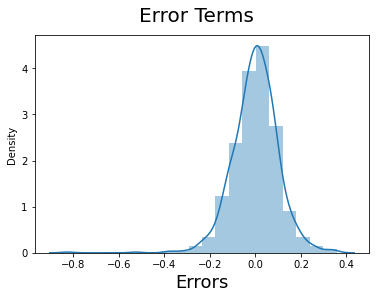

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

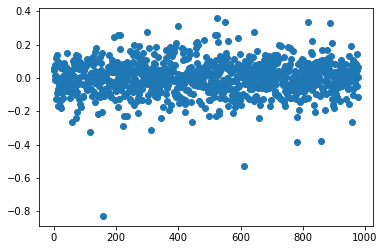

In [84]:
# Look for pattern in residual
plt.scatter(range(len(X_train)), res)

#### Making Predictions

In [85]:
# Now let's use our model to make predictions.
y_test_pred = regImpF.predict(X_test[impFeatures])

print(f"r2_score: {r2_score(y_test, y_test_pred)}")
rss = np.sum(np.square(y_test - y_test_pred))
print(f"RSS: {rss}")
mse = mean_squared_error(y_test, y_test_pred)
print(f"MSE: {mse}")
rmse = mse**2
print(f"RMSE: {rmse}")

r2_score: 0.6664774397019244
RSS: 5.63587657505166
MSE: 0.013418753750123
RMSE: 0.0001800629522064401
